# Analysing Image Classification Dataset

## Installation & Setting Up

In [ ]:
!pip install pip -U
!pip install fastdup
!pip install pandas
!pip install wurlitzer
%load_ext wurlitzer

## Download Imagenette Dataset

In [ ]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
!tar -xf imagenette2-160.tgz

## Load and Format Annotations

In [1]:
import pandas as pd

In [2]:
data_dir = 'imagenette2-160/'
csv_path = 'imagenette2-160/noisy_imagenette.csv'

In [3]:
label_map = {
    'n02979186': 'cassette_player', 
    'n03417042': 'garbage_truck', 
    'n01440764': 'tench', 
    'n02102040': 'English_springer', 
    'n03028079': 'church',
    'n03888257': 'parachute', 
    'n03394916': 'French_horn', 
    'n03000684': 'chain_saw', 
    'n03445777': 'golf_ball', 
    'n03425413': 'gas_pump'
}

Load the annotation provided with the dataset.

In [4]:
df_annot = pd.read_csv(csv_path)
df_annot.head(3)

path noisy_labels_0 noisy_labels_1  \
0   train/n02979186/n02979186_9036.JPEG      n02979186      n02979186   
1  train/n02979186/n02979186_11957.JPEG      n02979186      n02979186   
2   train/n02979186/n02979186_9715.JPEG      n02979186      n02979186   

  noisy_labels_5 noisy_labels_25 noisy_labels_50  is_valid  
0      n02979186       n02979186       n02979186     False  
1      n02979186       n02979186       n03000684     False  
2      n02979186       n03417042       n03000684     False

Transform the annotation to fastdup supported format.

In [5]:
# take relevant columns
df_annot = df_annot[['path', 'noisy_labels_0']]

# rename columns to fastdup's column names
df_annot = df_annot.rename({'noisy_labels_0': 'label', 'path': 'img_filename'}, axis='columns')

# create split column
df_annot['split'] = df_annot['img_filename'].apply(lambda x: x.split("/")[0])

# map label ids to regular labels
df_annot['label'] = df_annot['label'].map(label_map)

# show formated annotations
df_annot

img_filename            label  split
0               train/n02979186/n02979186_9036.JPEG  cassette_player  train
1              train/n02979186/n02979186_11957.JPEG  cassette_player  train
2               train/n02979186/n02979186_9715.JPEG  cassette_player  train
3              train/n02979186/n02979186_21736.JPEG  cassette_player  train
4      train/n02979186/ILSVRC2012_val_00046953.JPEG  cassette_player  train
...                                             ...              ...    ...
13389            val/n03425413/n03425413_17521.JPEG         gas_pump    val
13390            val/n03425413/n03425413_20711.JPEG         gas_pump    val
13391            val/n03425413/n03425413_19050.JPEG         gas_pump    val
13392            val/n03425413/n03425413_13831.JPEG         gas_pump    val
13393             val/n03425413/n03425413_1242.JPEG         gas_pump    val

[13394 rows x 3 columns]

## Import & Run fastdup

In this example we run fastdup by providing the annotations.

In [6]:
import fastdup
work_dir = 'fastdup_imagenette'

fd = fastdup.create(work_dir=work_dir, input_dir=data_dir) 
fd.run(annotations=df_annot, ccthreshold=0.9, threshold=0.8)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-03-20 17:57:26 [INFO] Going to loop over dir imagenette2-160
2023-03-20 17:57:26 [INFO] Found total 13394 images to run on
2023-03-20 17:57:54 [INFO] Found total 13394 images to run onimated: 0 Minutes 0 Features
2023-03-20 17:57:55 [INFO] 1657) Finished write_index() NN model
2023-03-20 17:57:55 [INFO] Stored nn model index file fastdup_imagenette/nnf.index
2023-03-20 17:57:56 [INFO] Total time took 30624 ms
2023-03-20 17:57:56 [INFO] Found a total of 0 fully identical images (d>0.990), which are 0.00 %
2023-03-20 17:57:56 [INFO] Found a total of 0 nearly identical images(d>0.980), which are 0.00 %
2023-03-20 17:57:56 [INFO] Found a total of 16741 above threshold images (d>0.800), which are 41.66 %
2023-03-20 17:57:56 [INFO] Found a total of 1339 outlier images         (d<0.050), which are 3.33 %
2023-03-20 17:57:56 [INFO] Min distance found 0.470 max distance 0.969
2023-03-20 17:57:56 [INFO] Running conne

## Outliers

Visualize outliers from the dataset.

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 29767.95it/s]

Stored outliers visual view in  fastdup_imagenette/galleries/outliers.html



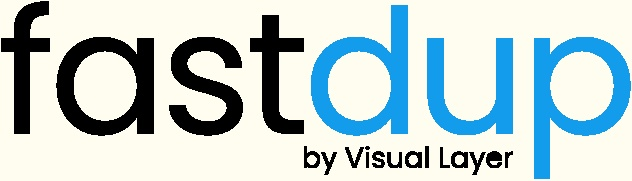
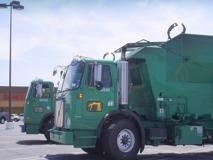
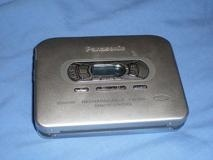
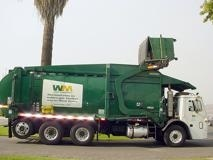
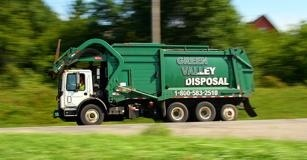
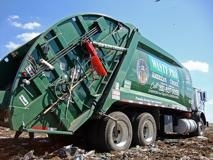
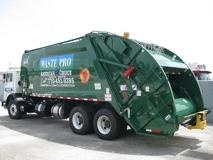
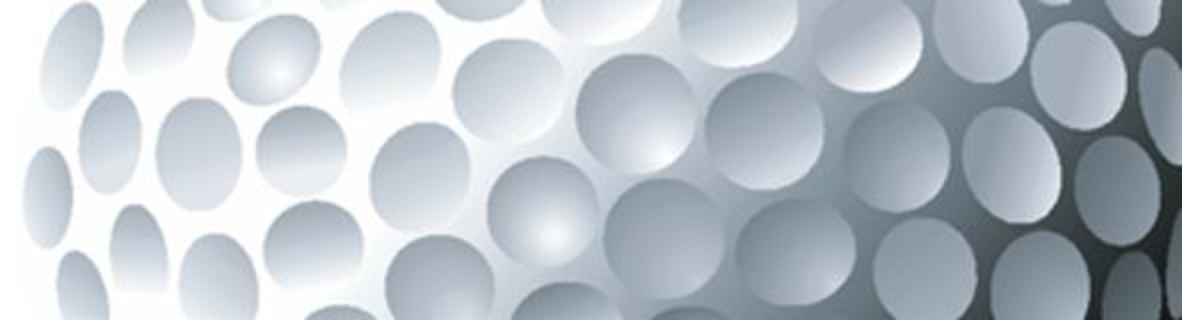
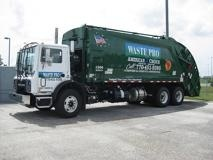
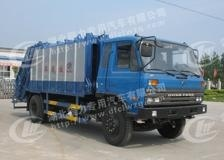
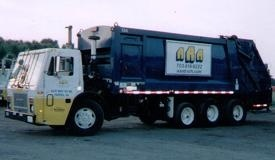
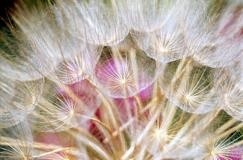
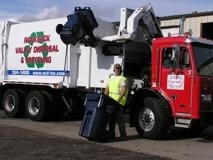
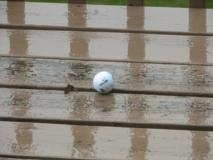
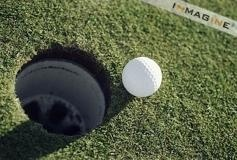
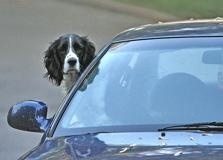
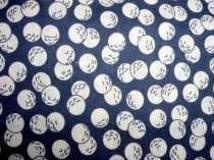
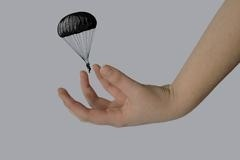
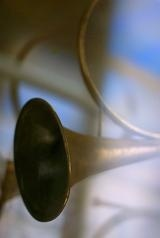
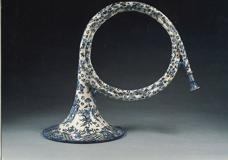
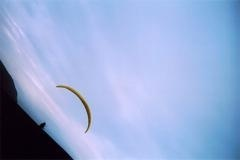

In [7]:
fd.vis.outliers_gallery()

Show outliers image data.

In [8]:
fd.outliers().head(5)

index  outlier  nearest  distance                  img_filename_outlier  \
0   1338    12009     1757  0.469904    val/n03417042/n03417042_29412.JPEG   
1   1336     2664     9763  0.476124   train/n02979186/n02979186_3967.JPEG   
2   1335    12172     1817  0.479290       val/n03417042/n03417042_91.JPEG   
3   1332    12131     1522  0.489770     val/n03417042/n03417042_7422.JPEG   
4   1330     5898     1392  0.505358  train/n03417042/n03417042_15485.JPEG   

     label_outlier split_outlier error_code_outlier  is_valid_outlier  \
0    garbage_truck           val              VALID              True   
1  cassette_player         train              VALID              True   
2    garbage_truck           val              VALID              True   
3    garbage_truck           val              VALID              True   
4    garbage_truck         train              VALID              True   

                  img_filename_nearest     label_nearest split_nearest  \
0  train/n02102040/n02102040_7256.JPEG  English_springer         train   
1     val/n01440764/n01440764_710.JPEG             tench           val   
2  train/n02102040/n02102040_7868.JPEG  English_springer         train   
3  train/n02102040/n02102040_4884.JPEG  English_springer         train   
4  train/n02102040/n02102040_3719.JPEG  English_springer         train   

  error_code_nearest  is_valid_nearest  
0              VALID              True  
1              VALID              True  
2              VALID              True  
3              VALID              True  
4              VALID              True

## Comparing Labels of Similar Images
Find possible mislabels by comparing a query image to other images in the dataset.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 180.17it/s]


Stored similar images visual view in  fastdup_imagenette/galleries/similarity.html



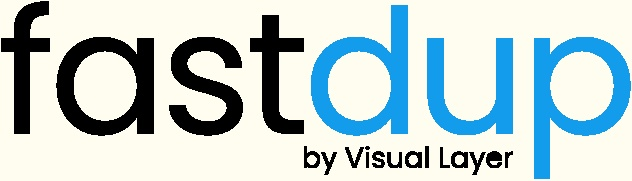
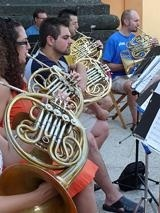
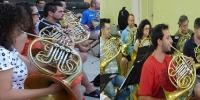
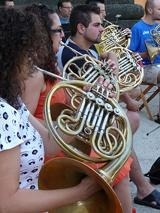
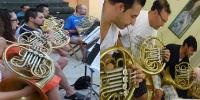
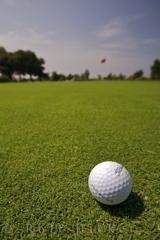
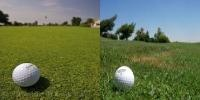
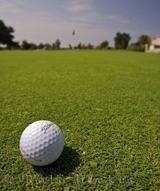
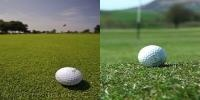
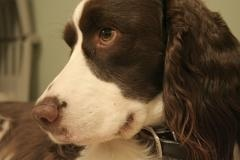
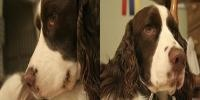
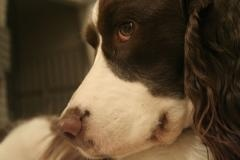
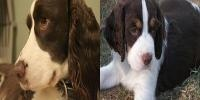
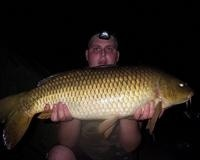
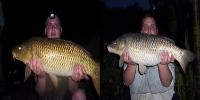
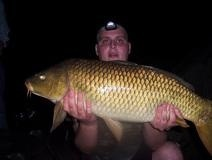
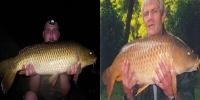
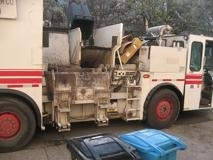
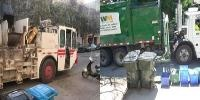
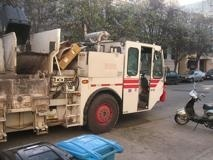
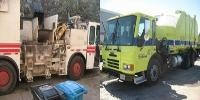
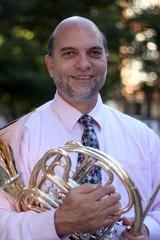
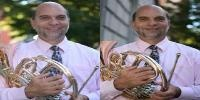
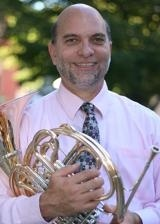
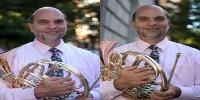
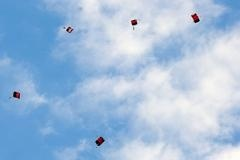
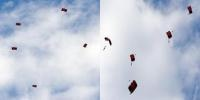
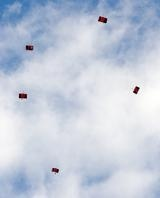
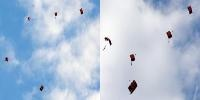
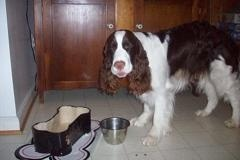
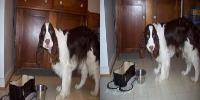
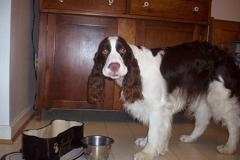
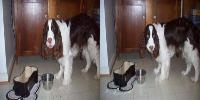
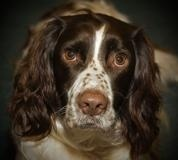
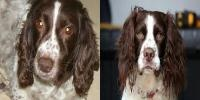
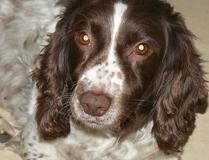
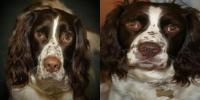
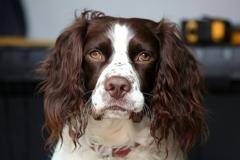
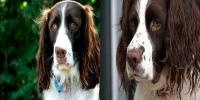
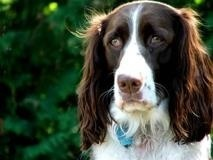
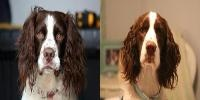

from  \
3630  imagenette2-160/train/n03394916/n03394916_44127.JPEG   
7819    imagenette2-160/val/n03394916/n03394916_30631.JPEG   
8751     imagenette2-160/val/n03445777/n03445777_6882.JPEG   
5358  imagenette2-160/train/n03445777/n03445777_13918.JPEG   
896    imagenette2-160/train/n02102040/n02102040_1564.JPEG   
...                                                    ...   
5911  imagenette2-160/train/n03888257/n03888257_12816.JPEG   
6219  imagenette2-160/train/n03888257/n03888257_38633.JPEG   
4320   imagenette2-160/train/n03417042/n03417042_3236.JPEG   
3429  imagenette2-160/train/n03394916/n03394916_32478.JPEG   
7497    imagenette2-160/val/n03028079/n03028079_13002.JPEG   

                                                                                                                to  \
3630    [imagenette2-160/val/n03394916/n03394916_30631.JPEG, imagenette2-160/train/n03394916/n03394916_36016.JPEG]   
7819  [imagenette2-160/train/n03394916/n03394916_44127.JPEG, imagenette2-160/train/n03394916/n03394916_29969.JPEG]   
8751     [imagenette2-160/train/n03445777/n03445777_13918.JPEG, imagenette2-160/val/n03445777/n03445777_5912.JPEG]   
5358        [imagenette2-160/val/n03445777/n03445777_6882.JPEG, imagenette2-160/val/n03445777/n03445777_8820.JPEG]   
896     [imagenette2-160/train/n02102040/n02102040_3837.JPEG, imagenette2-160/train/n02102040/n02102040_3586.JPEG]   
...                                                                                                            ...   
5911                                                        [imagenette2-160/train/n03888257/n03888257_38633.JPEG]   
6219                                                        [imagenette2-160/train/n03888257/n03888257_12816.JPEG]   
4320                                                        [imagenette2-160/train/n03417042/n03417042_12297.JPEG]   
3429                                                        [imagenette2-160/train/n03394916/n03394916_35573.JPEG]   
7497                                                         [imagenette2-160/train/n03028079/n03028079_3839.JPEG]   

                                     label  \
3630            [French_horn, French_horn]   
7819            [French_horn, French_horn]   
8751                [golf_ball, golf_ball]   
5358                [golf_ball, golf_ball]   
896   [English_springer, English_springer]   
...                                    ...   
5911                           [parachute]   
6219                           [parachute]   
4320                       [garbage_truck]   
3429                         [French_horn]   
7497                              [church]   

                                    label2              distance  
3630            [French_horn, French_horn]  [0.968786, 0.918324]  
7819            [French_horn, French_horn]  [0.968786, 0.903754]  
8751                [golf_ball, golf_ball]  [0.962459, 0.918005]  
5358                [golf_ball, golf_ball]   [0.962459, 0.91704]  
896   [English_springer, English_springer]  [0.953837, 0.908732]  
...                                    ...                   ...  
5911                           [parachute]            [0.800073]  
6219                           [parachute]            [0.800073]  
4320                       [garbage_truck]            [0.800024]  
3429                         [French_horn]            [0.800012]  
7497                              [church]            [0.800002]  

[9057 rows x 5 columns]

In [9]:
fd.vis.similarity_gallery() 

## Similar Image Pairs

Find similar image pairs within and across the train and validation subfolders. Pairs may include train-train, train-val, val-train, and val-val.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 343.69it/s]


Stored similarity visual view in  fastdup_imagenette/galleries/duplicates.html



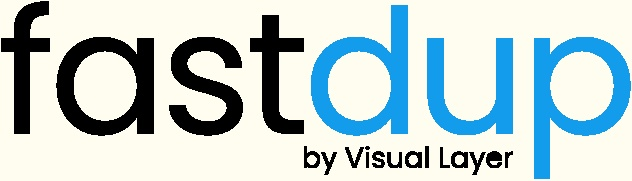
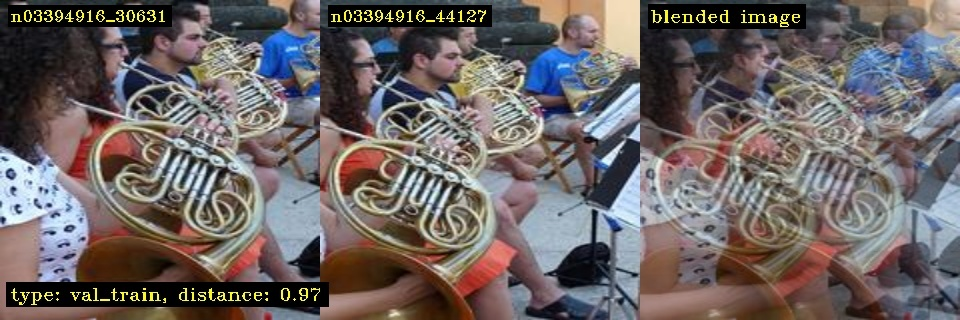
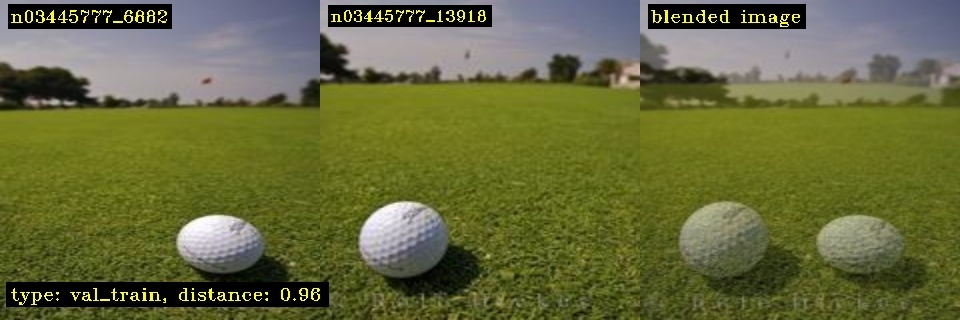
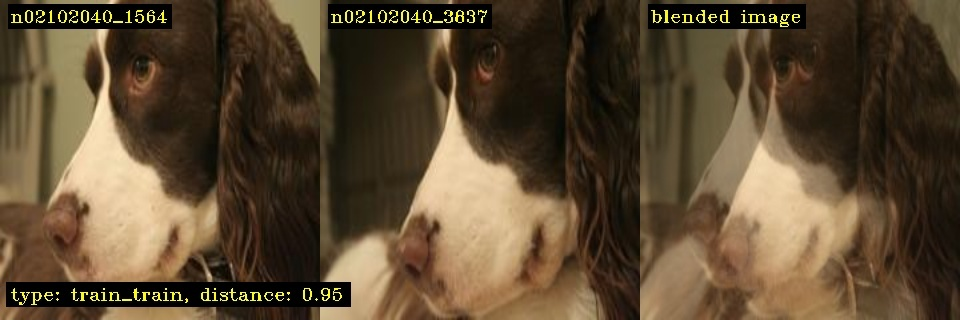
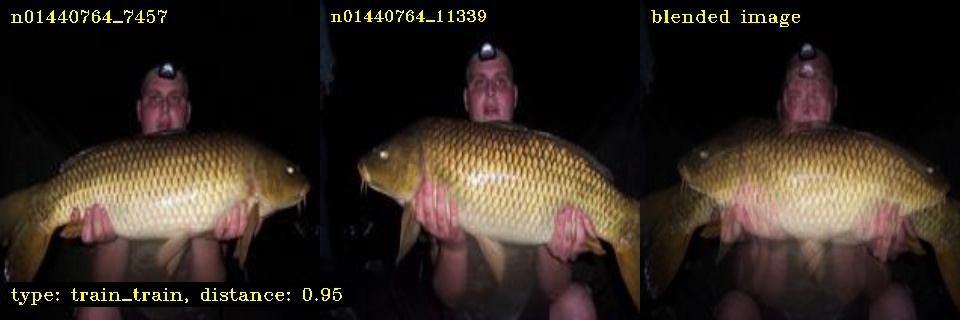
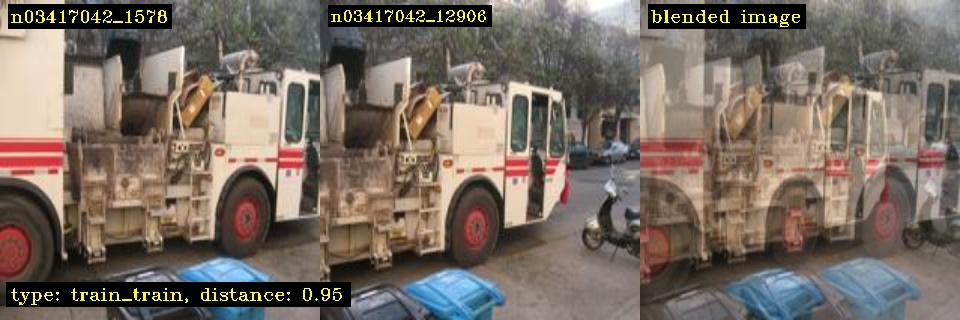
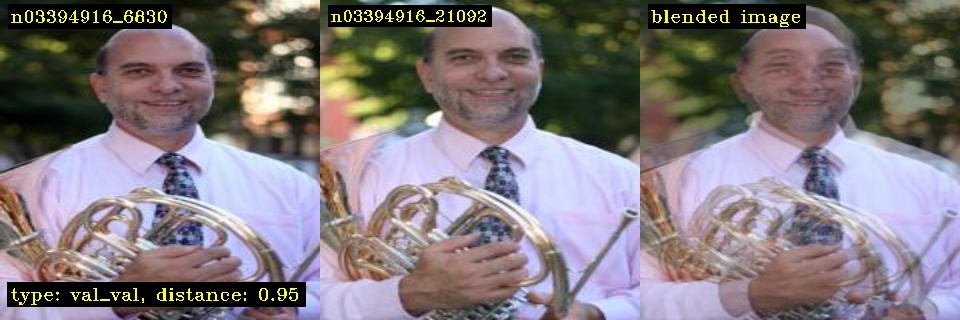
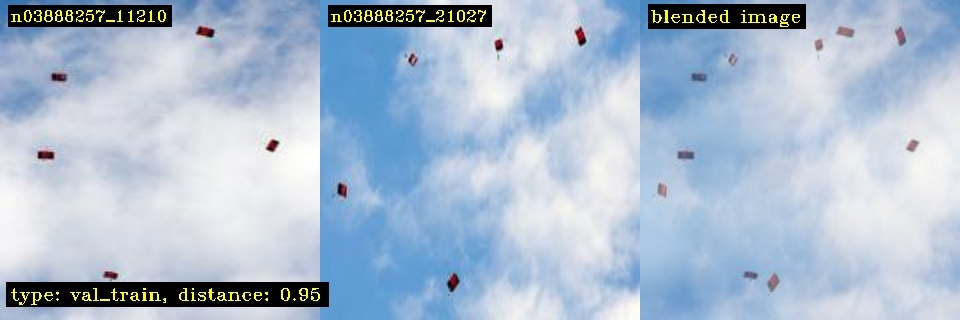
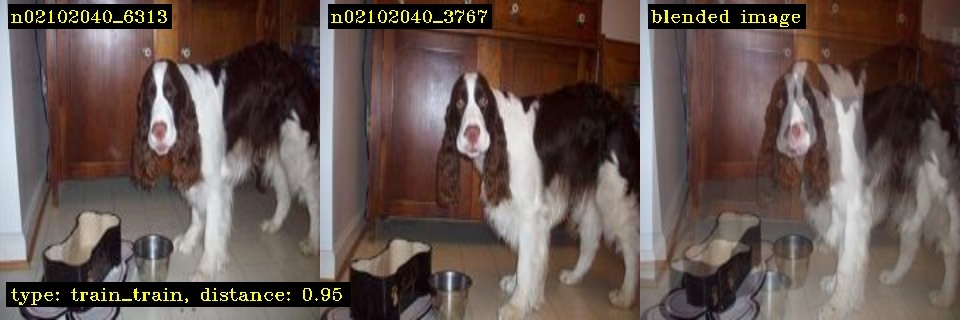
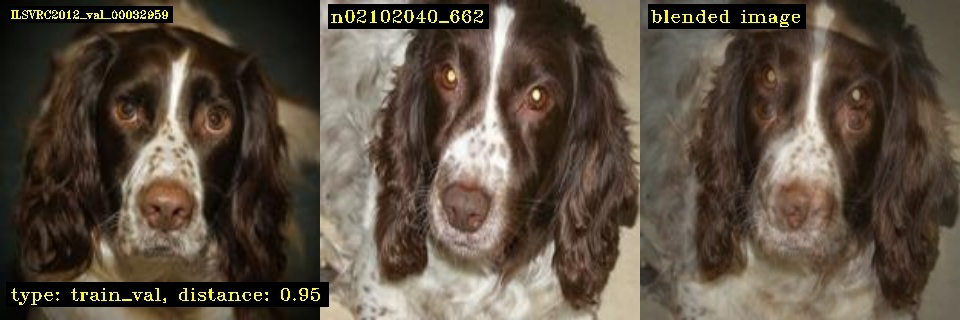
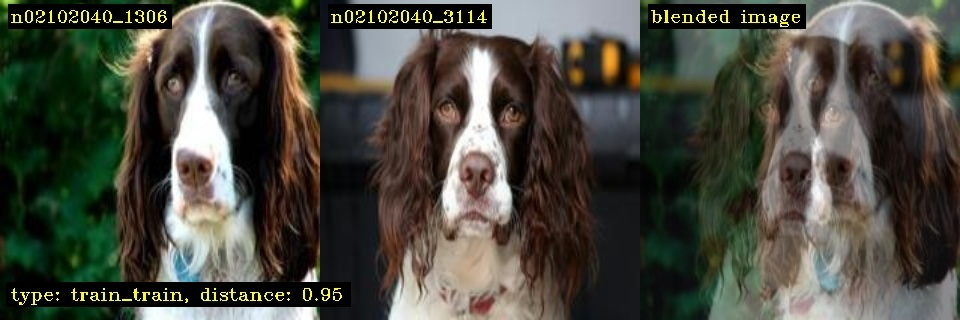

In [16]:
fd.vis.duplicates_gallery()

Show similar image pairs.

In [10]:
fd.similarity().head(5)

from     to  distance                     img_filename_from  \
0  11521   5390  0.968786    val/n03394916/n03394916_30631.JPEG   
1   5390  11521  0.968786  train/n03394916/n03394916_44127.JPEG   
2  12914   7715  0.962459     val/n03445777/n03445777_6882.JPEG   
3   7715  12914  0.962459  train/n03445777/n03445777_13918.JPEG   
4   1117   1404  0.953837   train/n02102040/n02102040_1564.JPEG   

         label_from split_from error_code_from  is_valid_from  \
0       French_horn        val           VALID           True   
1       French_horn      train           VALID           True   
2         golf_ball        val           VALID           True   
3         golf_ball      train           VALID           True   
4  English_springer      train           VALID           True   

                        img_filename_to          label_to split_to  \
0  train/n03394916/n03394916_44127.JPEG       French_horn    train   
1    val/n03394916/n03394916_30631.JPEG       French_horn      val   
2  train/n03445777/n03445777_13918.JPEG         golf_ball    train   
3     val/n03445777/n03445777_6882.JPEG         golf_ball      val   
4   train/n02102040/n02102040_3837.JPEG  English_springer    train   

  error_code_to  is_valid_to  
0         VALID         True  
1         VALID         True  
2         VALID         True  
3         VALID         True  
4         VALID         True

## Image Clusters

tench


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 97.47it/s]


Finished OK. Components are stored as image files fastdup_imagenette/galleries/components_[index].jpg
Stored components visual view in  fastdup_imagenette/galleries/components.html
Execution time in seconds 2.3



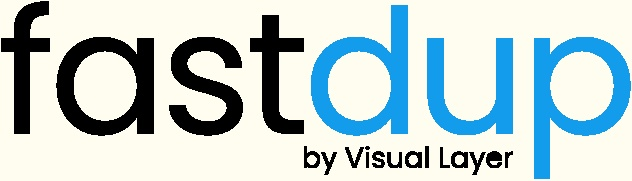
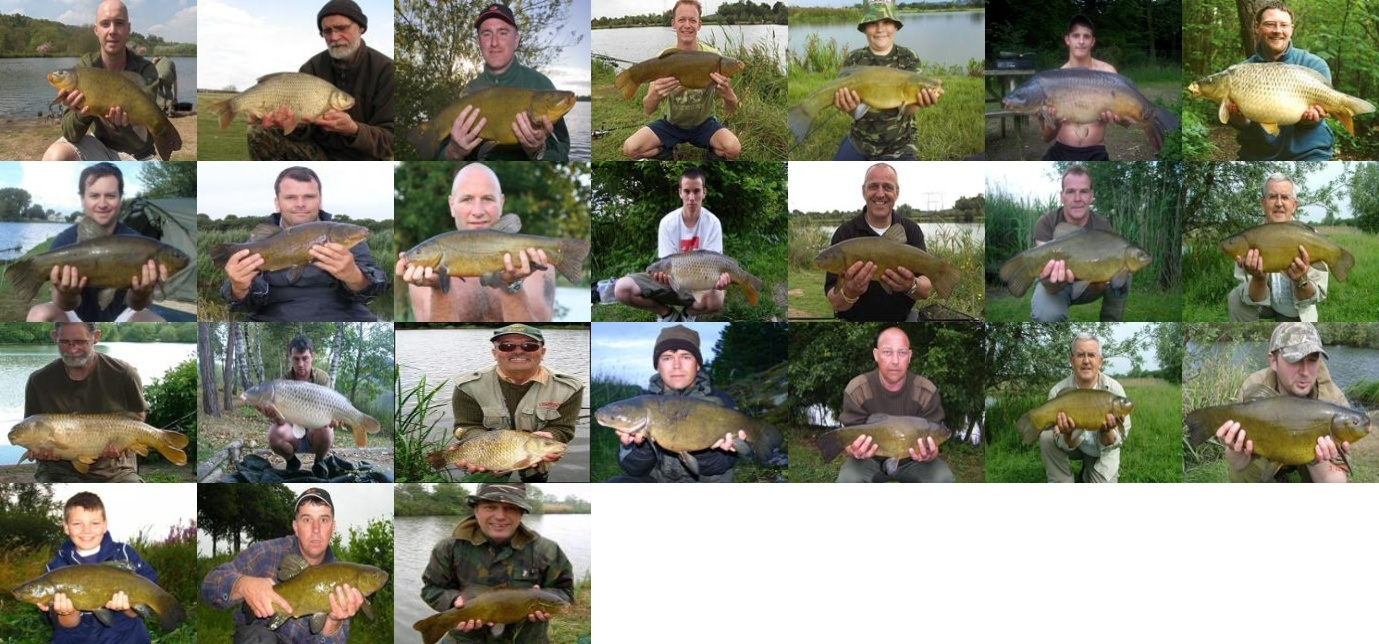
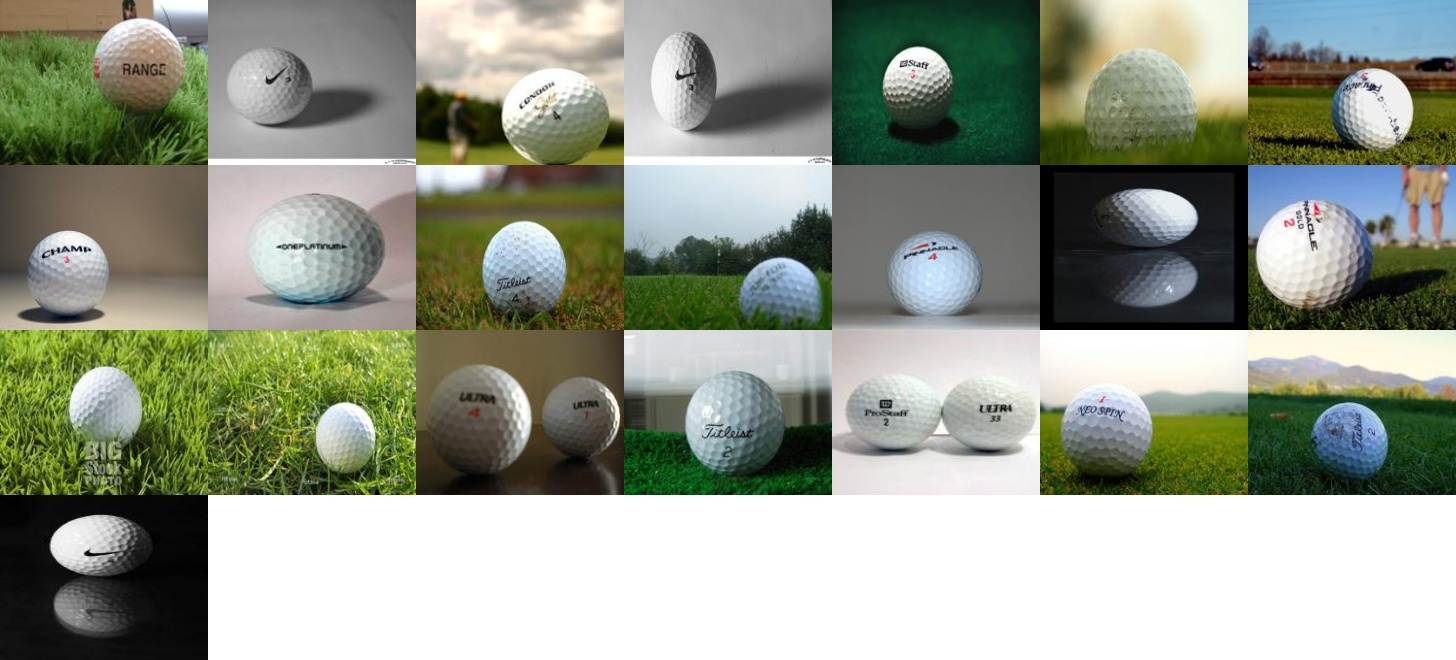
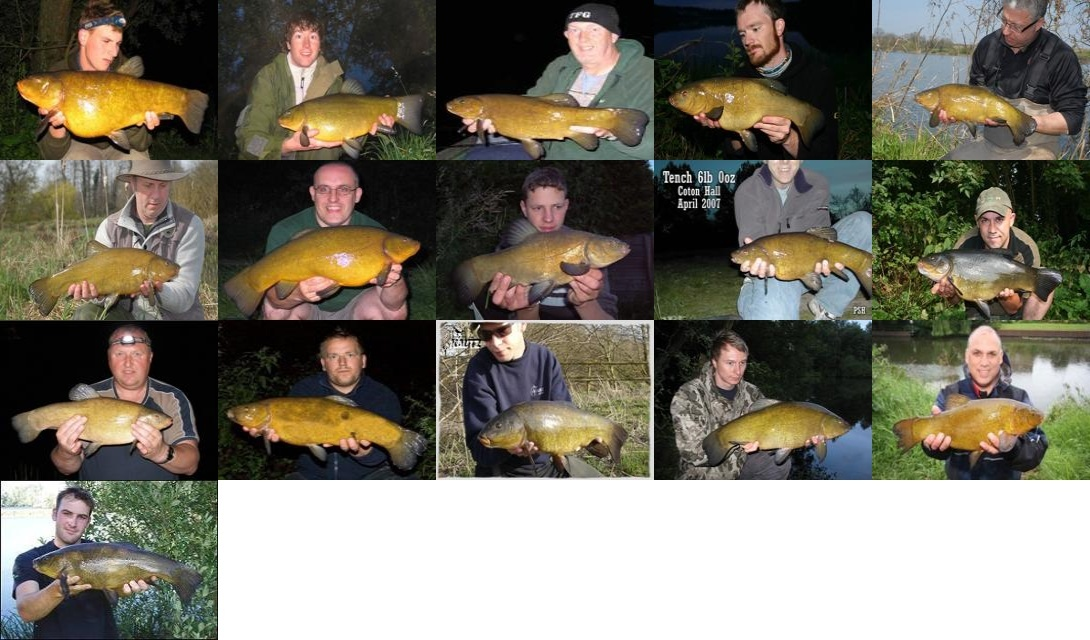
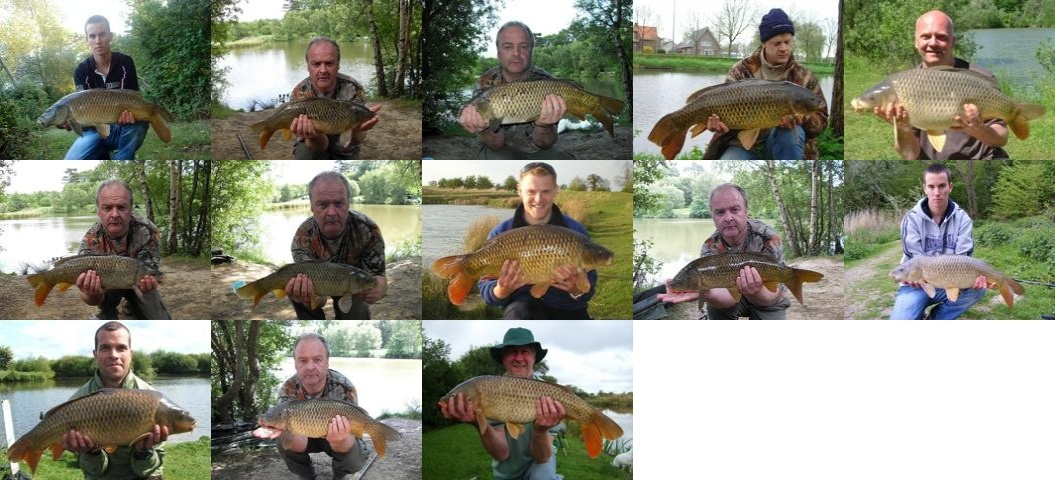
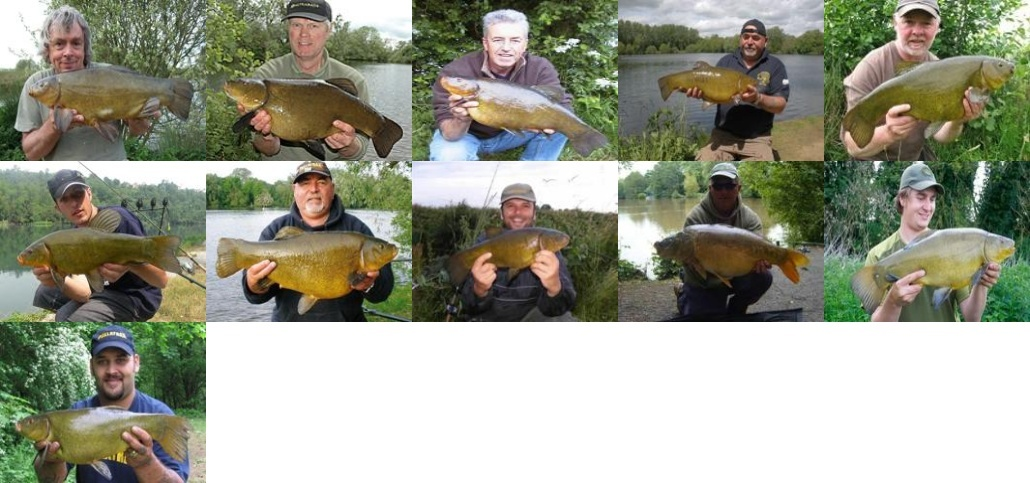
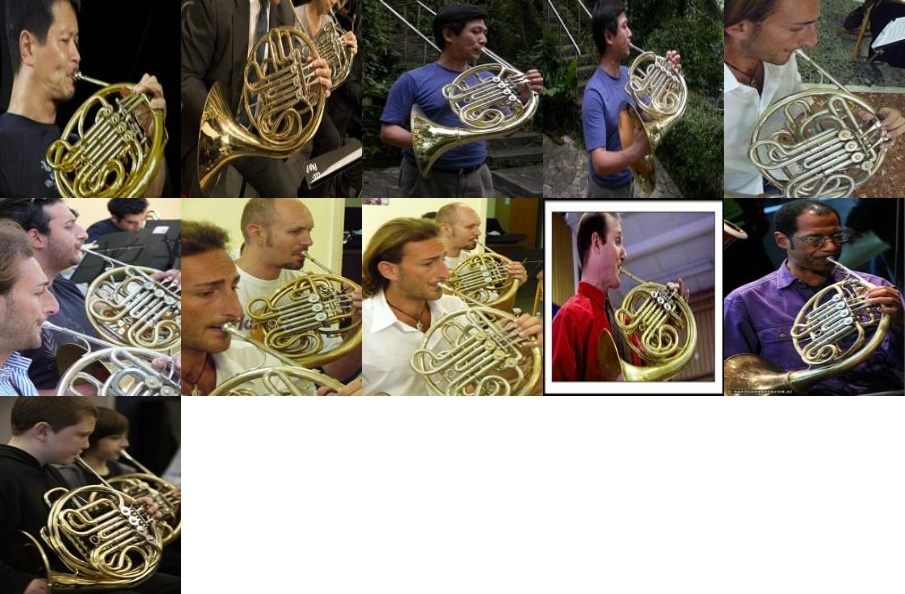
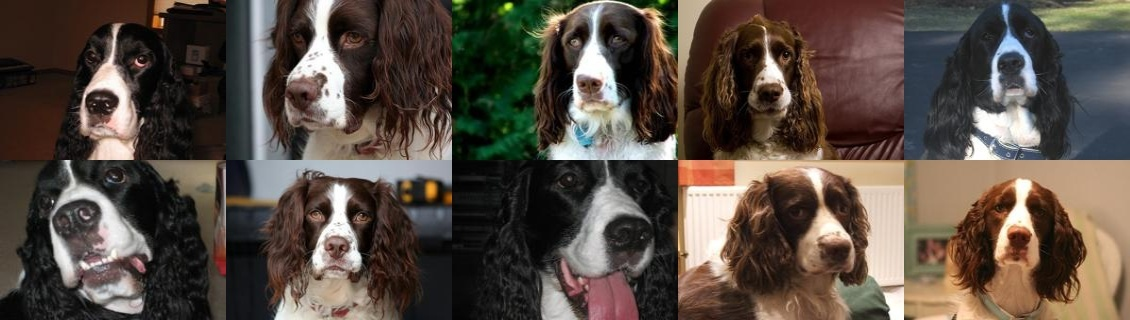
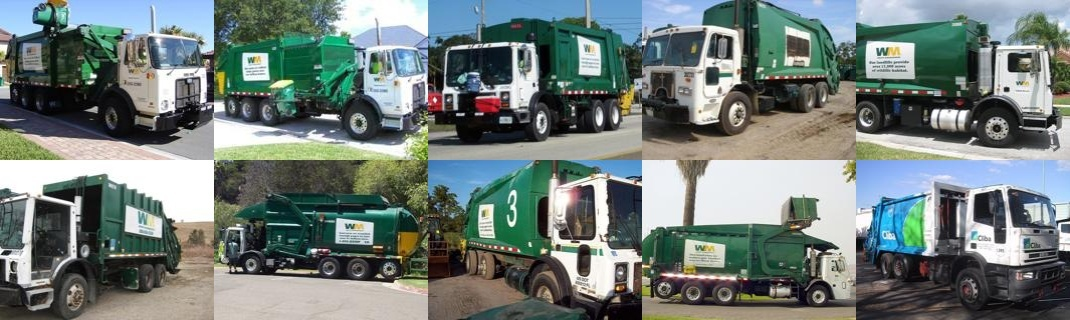
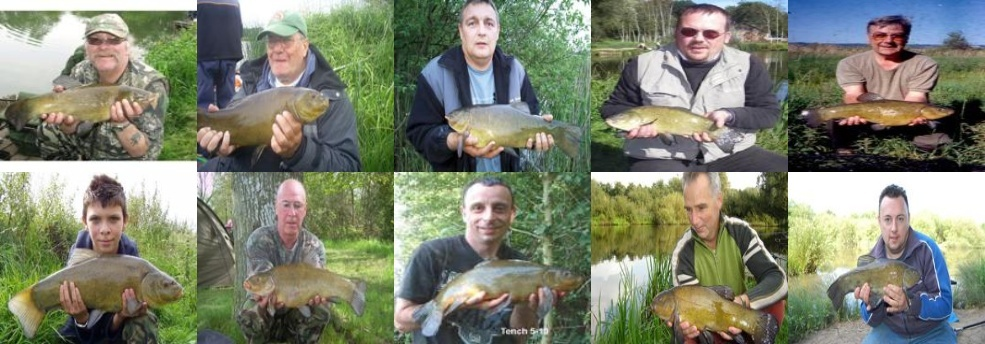
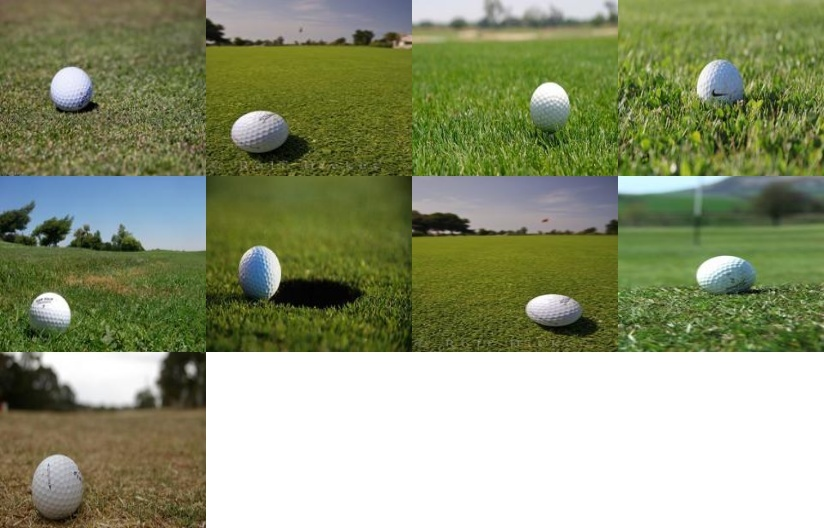
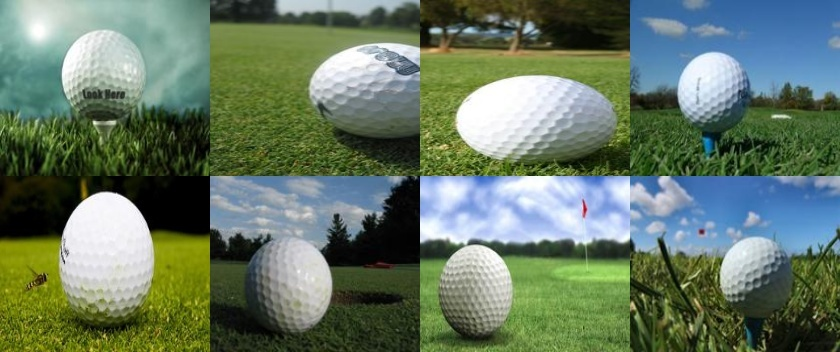
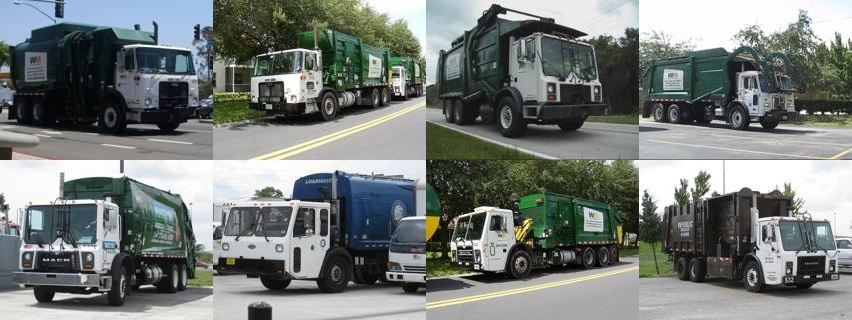
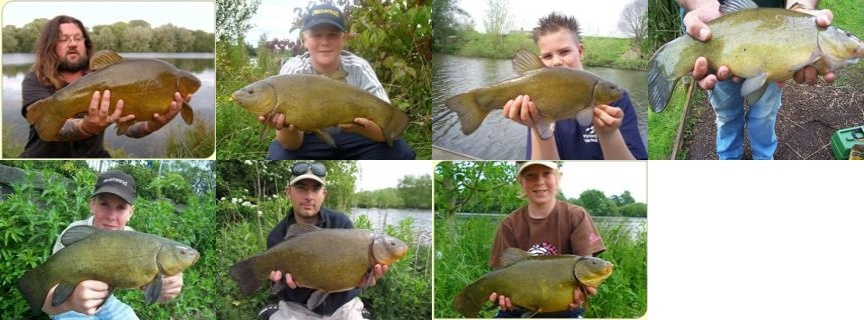
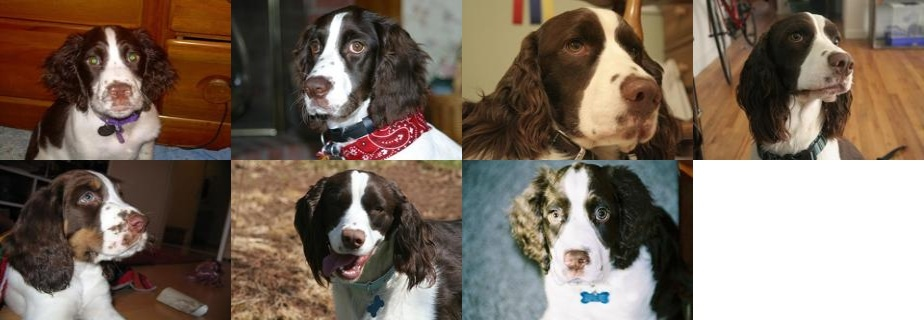
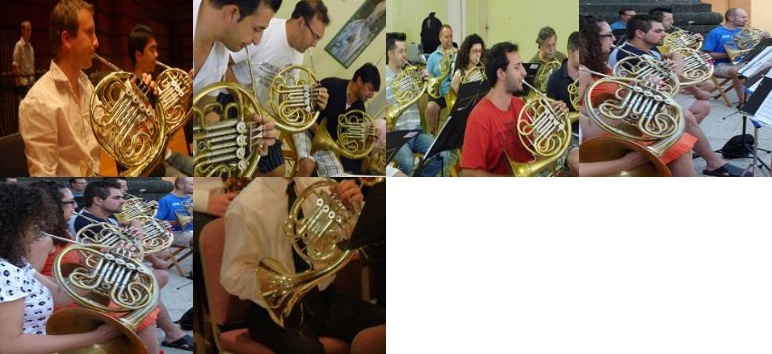
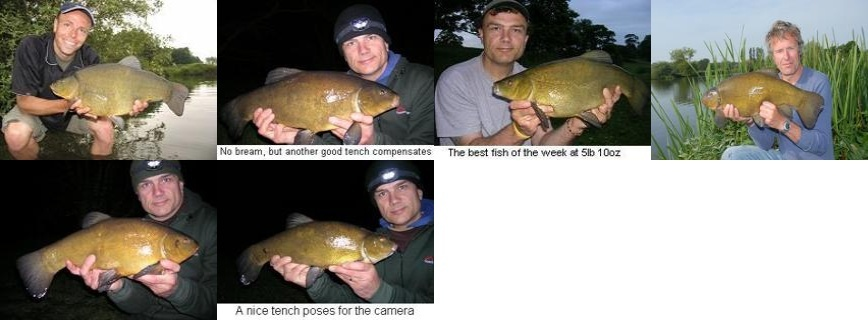
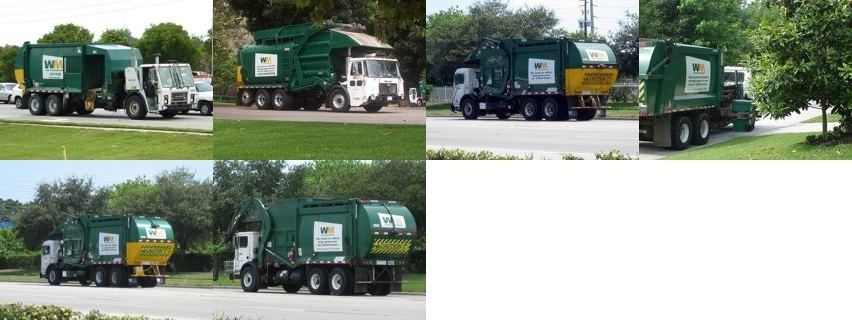
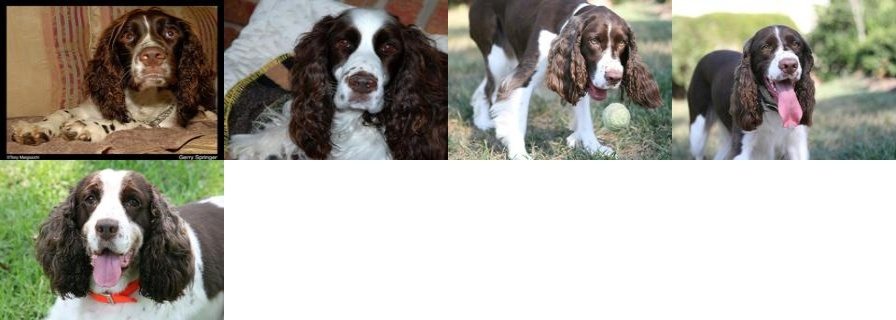
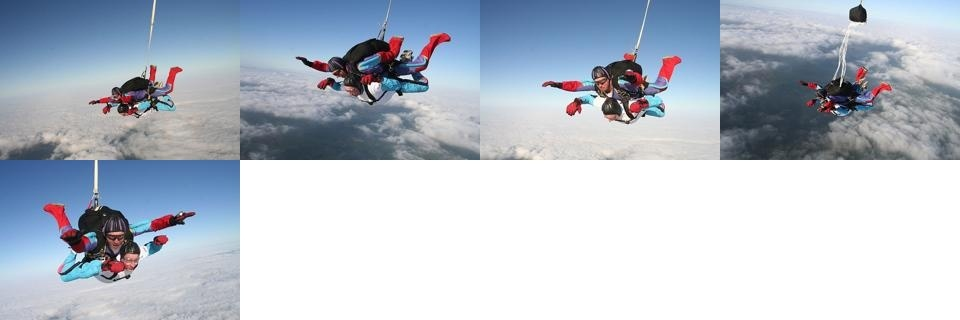
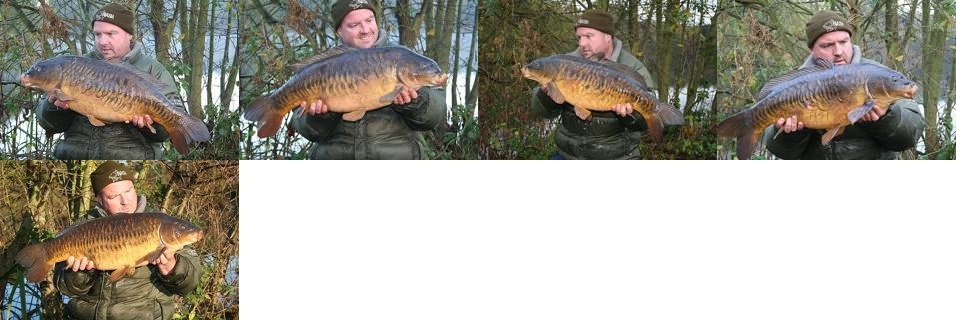

In [11]:
fd.vis.component_gallery()

You can also visualize clusters with specific labels using the `slice` parameter. For example let's visualize clusters with the `chain_saw` label

chain_saw


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 313.24it/s]

Finished OK. Components are stored as image files fastdup_imagenette/galleries/components_[index].jpg
Stored components visual view in  fastdup_imagenette/galleries/components.html
Execution time in seconds 1.4



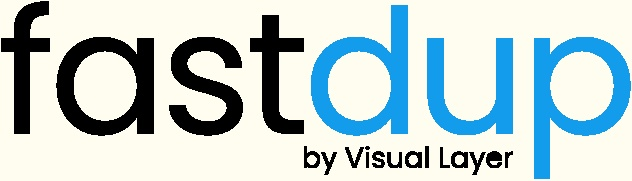
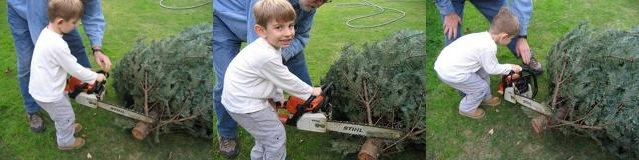
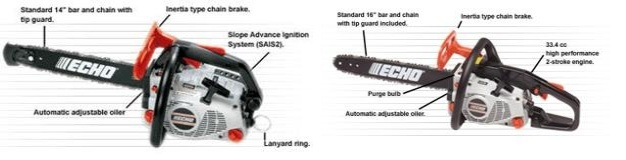
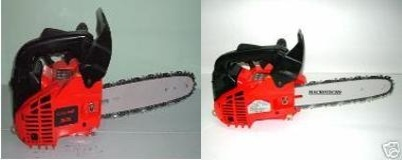
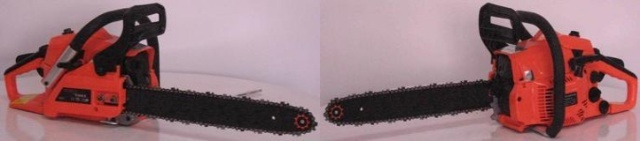
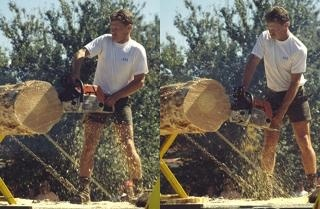
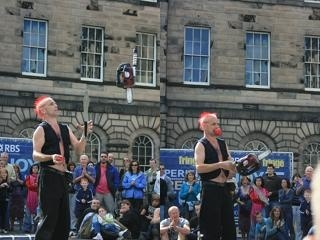
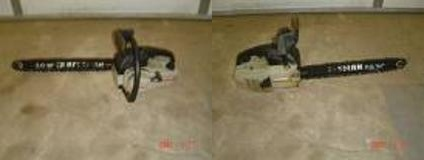
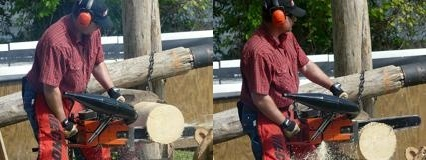
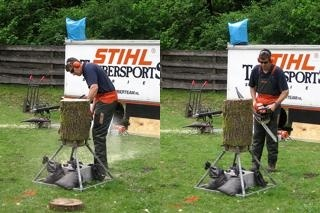
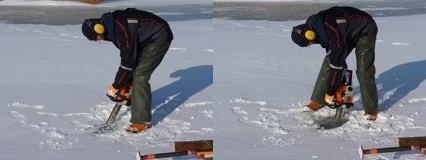
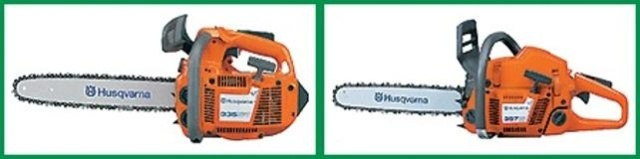

In [12]:
fd.vis.component_gallery(slice='chain_saw')

## Connected Components

In [13]:
cc_df, _ = fd.connected_components()
cc_df.sort_values('count', ascending=False).head(5)

fastdup_id  component_id      sum  count  mean_distance  min_distance  \
7778        7778          7332  36.6734   40.0         0.9168        0.9011   
7990        7990          7332  36.6734   40.0         0.9168        0.9011   
682          682            36  36.5815   40.0         0.9145        0.9003   
9545        9545            36  36.5815   40.0         0.9145        0.9003   
7651        7651          7332  36.6734   40.0         0.9168        0.9011   

      max_distance                          img_filename      label  split  \
7778        0.9328  train/n03445777/n03445777_16186.JPEG  golf_ball  train   
7990        0.9328   train/n03445777/n03445777_3503.JPEG  golf_ball  train   
682         0.9339   train/n01440764/n01440764_6159.JPEG      tench  train   
9545        0.9339    val/n01440764/n01440764_12250.JPEG      tench    val   
7651        0.9328  train/n03445777/n03445777_11389.JPEG  golf_ball  train   

     error_code  is_valid  
7778      VALID      True  
7990      VALID      True  
682       VALID      True  
9545      VALID      True  
7651      VALID      True

We can also get metadata for individual images using their `fastdup_id` available in `fd.annotations()`

In [14]:
fd[349]

{'img_filename': 'train/n01440764/n01440764_17789.JPEG',
 'label': 'tench',
 'split': 'train',
 'fastdup_id': 349,
 'error_code': 'VALID',
 'is_valid': True}